[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
45/45 [==============================] - 4s 13ms/step - loss: 0.0204
Epoch 2/50
45/45 [==============================] - 1s 23ms/step - loss: 7.8144e-04
Epoch 3/50
45/45 [==============================] - 1s 13ms/step - loss: 5.5564e-04
Epoch 4/50
45/45 [==============================] - 1s 13ms/step - loss: 5.2252e-04
Epoch 5/50
45/45 [==============================] - 1s 13ms/step - loss: 5.1304e-04
Epoch 6/50
45/45 [==============================] - 1s 14ms/step - loss: 4.6217e-04
Epoch 7/50
45/45 [==============================] - 1s 13ms/step - loss: 4.4354e-04
Epoch 8/50
45/45 [==============================] - 1s 12ms/step - loss: 4.3835e-04
Epoch 9/50
45/45 [==============================] - 1s 12ms/step - loss: 4.1294e-04
Epoch 10/50
45/45 [==============================] - 1s 12ms/step - loss: 4.1987e-04
Epoch 11/50
45/45 [==============================] - 1s 12ms/step - loss: 3.8792e-04
Epoch 12/

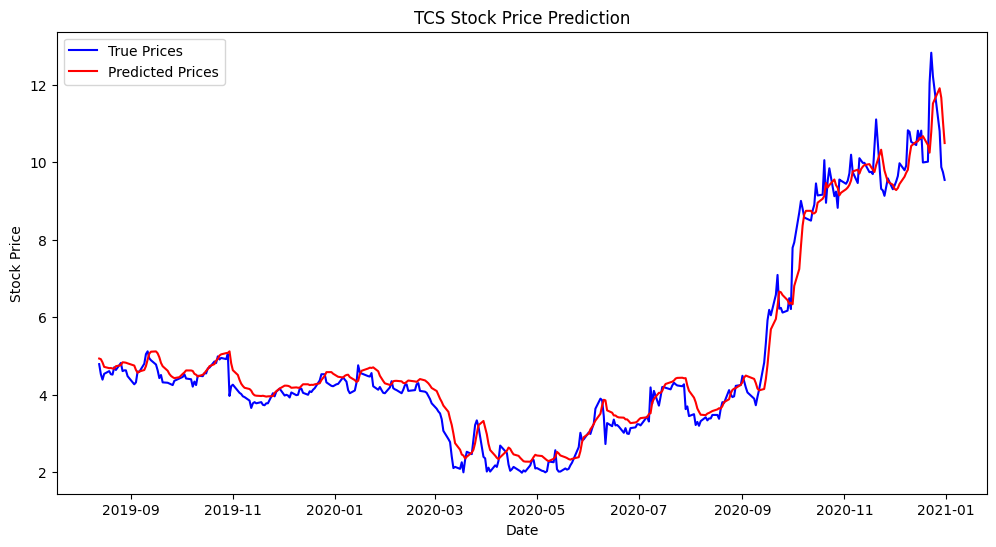

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential#imported keras within tensorflow 
from tensorflow.keras.layers import LSTM, Dense#-----------//----------------
from tensorflow.keras.optimizers import Adam#------------//----------

# Fetch historical stock price data from Yahoo Finance
company_symbol = "TCS"  # Replace with the symbol of the company you want to predict
start_date = "2010-01-01"
end_date = "2021-01-01"
df = yf.download(company_symbol, start=start_date, end=end_date)

# Preprocess the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create sequences for training and testing
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)#converted the array 

seq_length = 10  # You can adjust this sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and actual prices to their original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predicted_prices)
print("Mean Squared Error:", mse)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size+seq_length:], y_test, label='True Prices', color='blue')
plt.plot(df.index[train_size+seq_length:], predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{company_symbol} Stock Price Prediction')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


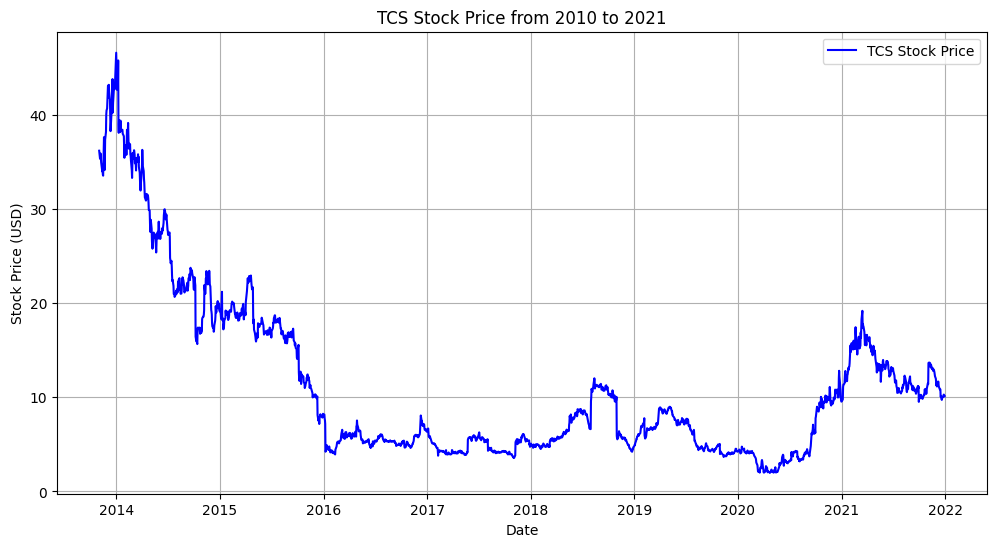

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the company symbol and date range
company_symbol = "TCS"
start_date = "2010-01-01"
end_date = "2021-12-31"

# Fetch historical stock price data from Yahoo Finance
df = yf.download(company_symbol, start=start_date, end=end_date)

# Plot the historical stock price data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{company_symbol} Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title(f'{company_symbol} Stock Price from 2010 to 2021')
plt.legend()
plt.grid(True)
plt.show()